In [1]:
%%capture
!pip install --upgrade pip
!pip install tensorflow numpy==1.16 sklearn matplotlib

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [1]:
corpus_raw = 'He is the king . The king is royal . She is the royal queen '
corpus_raw = corpus_raw.lower()


In [2]:
words = []
# parse through the corpus and remove the dots
for word in corpus_raw.split():
  if word !='.':
    words.append(word)


# Convert words into integers and vice versa
word2int = {}
int2word = {}
vocab_size = len(words)

for i, word in enumerate(words):
    # TODO 1: Fill in the logic for word2int and int2word mappings
    # for example: word_to_int has words as keys and integers as value
    word2int[word]=i
    int2word[i] = word
print(word2int)

{'he': 0, 'is': 9, 'the': 10, 'king': 5, 'royal': 11, 'she': 8, 'queen': 12}


In [3]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [6]:
WINDOW_SIZE = 2
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] :
            if nb_word != word:
                data.append([word, nb_word])

### ***What does the previous cell do ?***
* We are going through each sentence in the corpus (that have been dlimited by the dot). Then for each sentence we are going through each word and we are creating a list of words that are in the window of the word we are looking at.

In [7]:

def to_one_hot(data_point_index, vocab_size):
    # TODO 2: Implement the one-hot encoding function here.
    # initialize a list of zeros equal to vocab_size
    # turn this list into a one hot vector for the data_point_index
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp


In [9]:
x_train = [] # input words
y_train = [] # output words

for data_word in data:
    # TODO 3: Append appropriate one-hot encoded vectors to x_train and y_train
    x_train.append(to_one_hot(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]], vocab_size))

In [10]:

# Convert lists to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))
### ***What does the previous cell do ?***
* np.asarray permit to convert a list into an array 
* Then we defind x and y_label as placeholder: a variable/data which will be assigned later. 

In [11]:

EMBEDDING_DIM = 5

# TODO 5: Initialize weight matrices W1 and W2 with random values, and biases b1 and b2.
# Use tf.Variable and tf.random_normal with the appropriate shapes to initialize layers and biases
# look at the slides if you don't remember the layer shapes

W1 =  tf.Variable(tf.random_normal([vocab_size,EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM,vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

In [13]:

# TODO 6: Calculate the hidden representation of the word.
# "hidden representation" means the value of the vector after the first layer
# i.e. the vector within the latent space of the network
# use tf.add and tf.matmul
hidden_representation = tf.add(tf.matmul(x,W1),b1)

In [14]:

# TODO 7: Compute the prediction, the output from the output layer.
# hint: the prediction follows is the hidden representation passed through the second layer
# don't forget to add the softmax to turn the outputs into a probability distribution
# you may use tf.nn.softmax for that
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2),b2))

In [15]:
sess = tf.Session() # create a session 
init = tf.global_variables_initializer() # initialize all variables
sess.run(init) 

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
### ***What does the previous cell do ?***
* first we create a session, it just means that we are going to run the code in the session
*  then we initialize all the variables, which means that we are going to assign them a value
*  finally we run the session with the initialized variables

In [16]:
# Define the loss function:
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

### ***Which loss function is this ?***
* The loss function is the cross entropy loss function

### ***Why do we use it here ?***
* cross entropy loss function is good to use when we have a classification problem where its labels in one hot encoding for our multi-class output probability distribution.

In [19]:

# Define the training step:
# TODO 10: Use an optimizer to minimize the loss.
# look through the documentation:
# https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/GradientDescentOptimizer
# tf.compat.v1 is replaced with tf in our code
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [20]:

n_iters = 10000

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})

vectors = sess.run(W1 + b1)

### ***Reminder***

Euclidian distance:
$$ ||x-y||_2 = \sqrt{ \sum_{i=1}^{N} (x_i - y_i)^2 } $$

In [21]:
# TODO 11 (last one!): implement the euclidian distance function using numpy
def euclidean_dist(vec1, vec2):
    distance = np.sqrt(np.sum(np.square(vec1-vec2)))
    return distance

### ***What is TSNE ? How is it useful here ?***
* The TSNE 


In [22]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

[[ 0.97416127 -0.22585388]
 [-0.54362106  0.83933085]
 [-0.8678058   0.4969035 ]
 [ 0.9559456  -0.29354367]
 [-0.9774664   0.21109106]
 [ 0.979977   -0.19911085]
 [-0.99998444 -0.00557128]
 [ 0.9790458  -0.20364009]
 [ 0.99888766 -0.04715269]
 [-0.30713022  0.9516675 ]
 [-0.9582839   0.285818  ]
 [-0.99551785 -0.09457336]
 [ 0.92998606 -0.3675947 ]]


['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen']
he -0.22585388
is 0.9516675
the 0.285818
king -0.19911085
the 0.285818
king -0.19911085
is 0.9516675
royal -0.09457336
she -0.047152694
is 0.9516675
the 0.285818
royal -0.09457336
queen -0.3675947


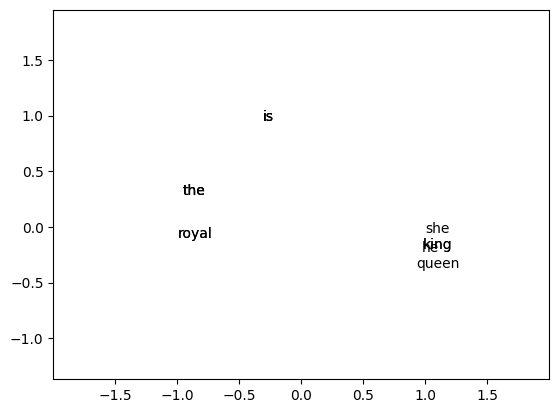

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-1, max([vectors[word2int[w]][0] for w in words])+1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-1, max([vectors[word2int[w]][1] for w in words])+1)
plt.show()

### ***You should see something similar:***
<img src="word_2_vec_result.png">

### ***Comment on what you've understood from this course***
For example:
* What is word2vec ?
  * What I understood is that the goal of word2vec is to create a vector representation of words that capture their meaning, and so their relationships with the context in which they are used.
* Why is it an improvement on BoW and TF-IDF
  * They don't capture the meaning of the words, then cat and dog have nothing in common. It's is then impossible for exemple to predit the next word in a sentence, or to find the closest word to a word...
* What is an encoder network, can you imagine an example to illustrate this notion ?
  * An encoder network is an encoder that use a neural network to encode the input into a new space representation. For example, we can use an encoder network to encode an image into a vector representation of the image.